In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv(r"Working_Data\heart-disease.csv")

In [3]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
X = dt.drop("target",axis=1)
y = dt["target"]

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [11]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
clf.score(X_test,y_test)

0.7868852459016393

In [13]:
lst1 = []
for i in range(1,100):
    clf4 = RandomForestClassifier(n_estimators = 20,random_state=i)
    clf4.fit(X_train,y_train)
    lst1.append(clf4.score(X_test,y_test))
print(max(lst1))

0.8032786885245902


In [14]:
clf = RandomForestClassifier(n_estimators = 50,random_state=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8032786885245902

In [15]:
lst1 = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators = 50,random_state=1,min_samples_split=i)
    clf.fit(X_train,y_train)
    lst1.append(clf.score(X_test,y_test))
lst1.index(max(lst1))

54

In [16]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
y_preds = clf.predict(X_train)
from sklearn.metrics import classification_report

print(classification_report(y_train,y_preds))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [27]:
clf = RandomForestClassifier(n_estimators = 50,random_state=1,min_samples_split=10)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
y_preds = clf.predict(X_train)
from sklearn.metrics import classification_report

print(classification_report(y_train,y_preds))

0.9628099173553719
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.96      0.97      0.97       134

    accuracy                           0.96       242
   macro avg       0.96      0.96      0.96       242
weighted avg       0.96      0.96      0.96       242



In [22]:
clf = RandomForestClassifier(n_estimators = 50,random_state=1,min_samples_split=55,max_depth=5,min_samples_leaf=1)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
y_preds = clf.predict(X_train)
from sklearn.metrics import classification_report

print(classification_report(y_train,y_preds))

0.8760330578512396
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       108
           1       0.87      0.91      0.89       134

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242



In [17]:
clf = RandomForestClassifier(n_estimators = 50,random_state=1,min_samples_split=55,max_depth=5,min_samples_leaf=1)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_preds = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

0.819672131147541
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [18]:
import sklearn.svm as skv

In [38]:
clf = skv.SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_preds = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        30
           1       0.54      0.81      0.65        31

    accuracy                           0.56        61
   macro avg       0.57      0.55      0.52        61
weighted avg       0.57      0.56      0.53        61



In [20]:
clf = skv.LinearSVC(dual=False,C=0.01)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_preds = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [21]:
clf = skv.SVC(kernel="linear")
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



0.819672131147541


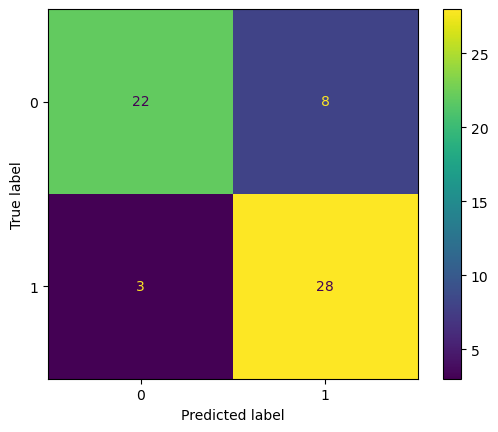

In [29]:
clf = RandomForestClassifier(n_estimators = 50,random_state=1,min_samples_split=55,max_depth=5,min_samples_leaf=1)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_preds = clf.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

0.8032786885245902


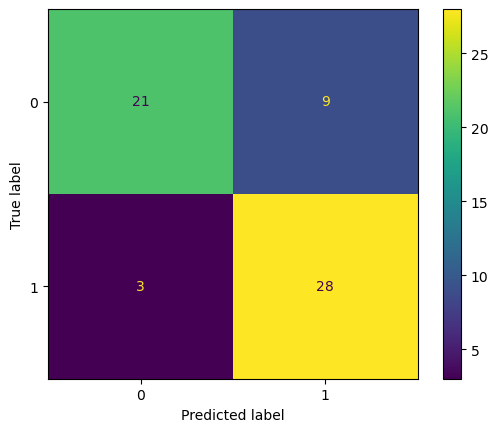

In [34]:
clf = RandomForestClassifier(n_estimators = 50,random_state=1)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_preds = clf.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

0.5573770491803278


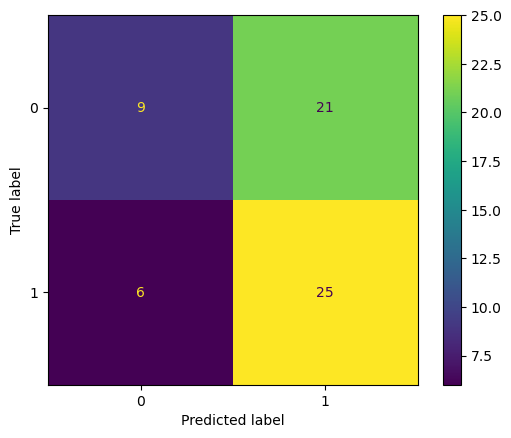

In [36]:
clf = skv.SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_preds = clf.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

0.7704918032786885


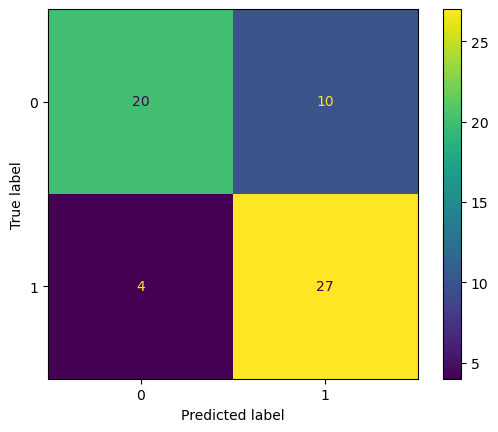

In [39]:
clf = skv.LinearSVC(dual=False,C=0.01)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_preds = clf.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

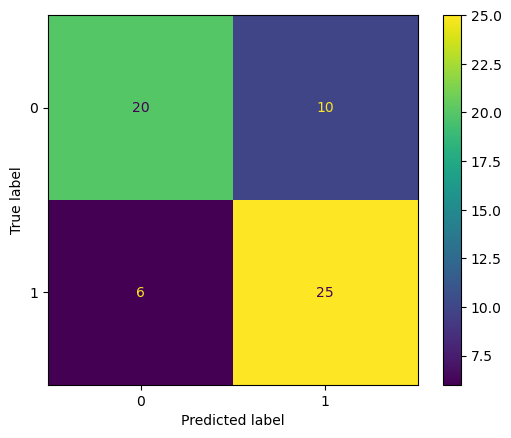

In [42]:
clf = skv.SVC(kernel="linear")
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)